In [5]:
from significance import SignificanceTester
import pandas as pd
import numpy as np

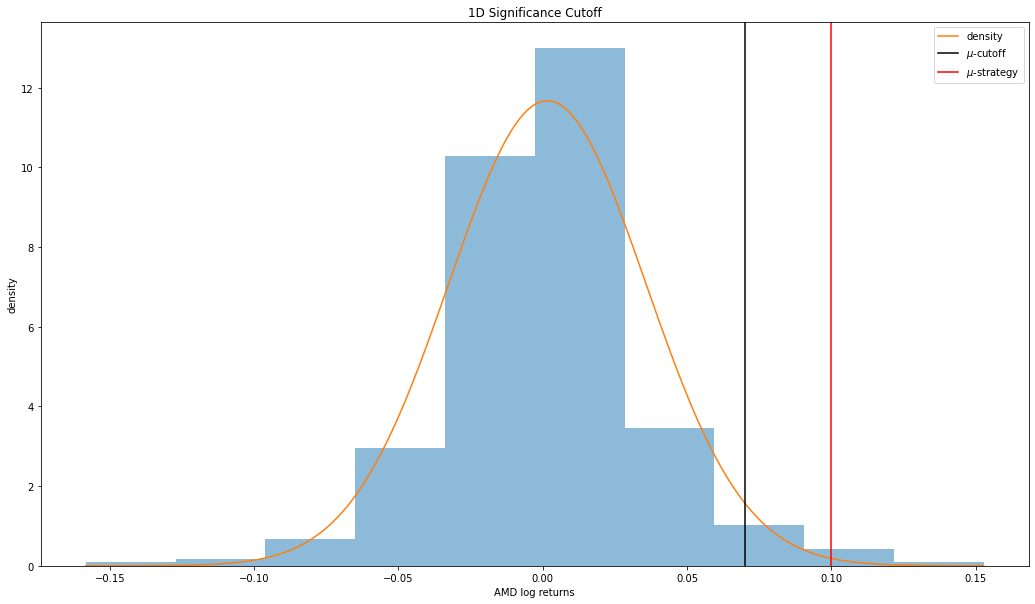

Needed:  2
Given :  2.88011001154048
The strategies returns are significant.


In [10]:
'''
Assume a hypothetical strategy produces a 0.10 average log adjusted daily return. And the strategy
only trades AMD, as well as the fact that it began trading on 2020-01-01.
We can check the signifiance of the strategy like so.
'''

test1 = SignificanceTester(pd.to_datetime('2020-01-01'))
test1.add_returns('AMD')
needed, given = test1.test(np.matrix([[0.10]]))

print('Needed: ', needed)
print('Given : ', given)
if given >= needed:
    print('The strategies returns are significant.')

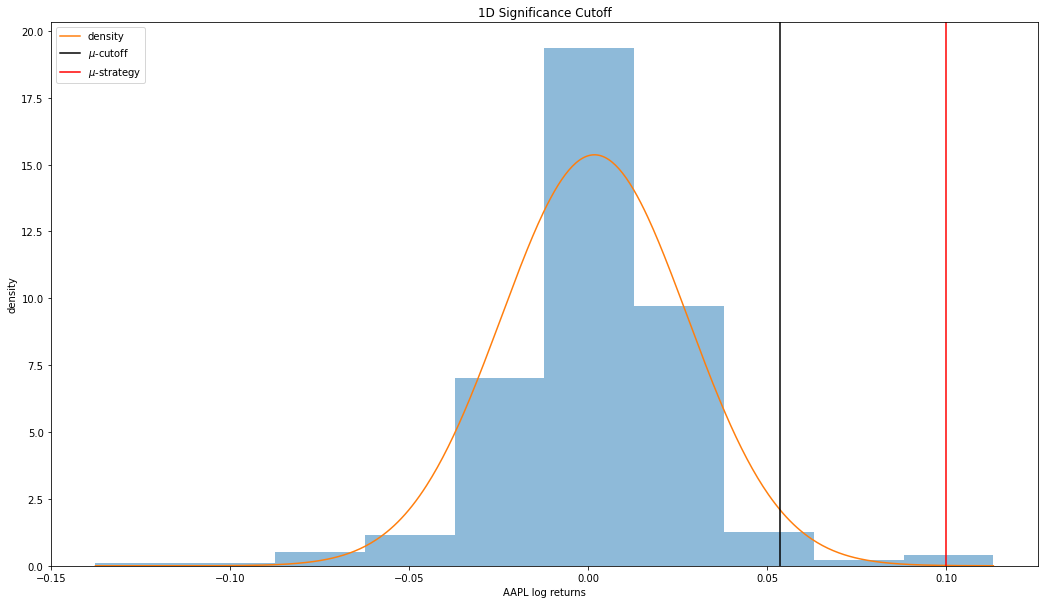

Needed:  2
Given :  3.785610036134266
The strategies returns are significant.


In [12]:
'''
Assume that we run the same strategy and also produce the same returns on AAPL
over the same time period.
'''
test2 = SignificanceTester(pd.to_datetime('2020-01-01'))
test2.add_returns('AAPL')
needed, given = test2.test(np.matrix([[0.10]]))

print('Needed: ', needed)
print('Given : ', given)
if given >= needed:
    print('The strategies returns are significant.')

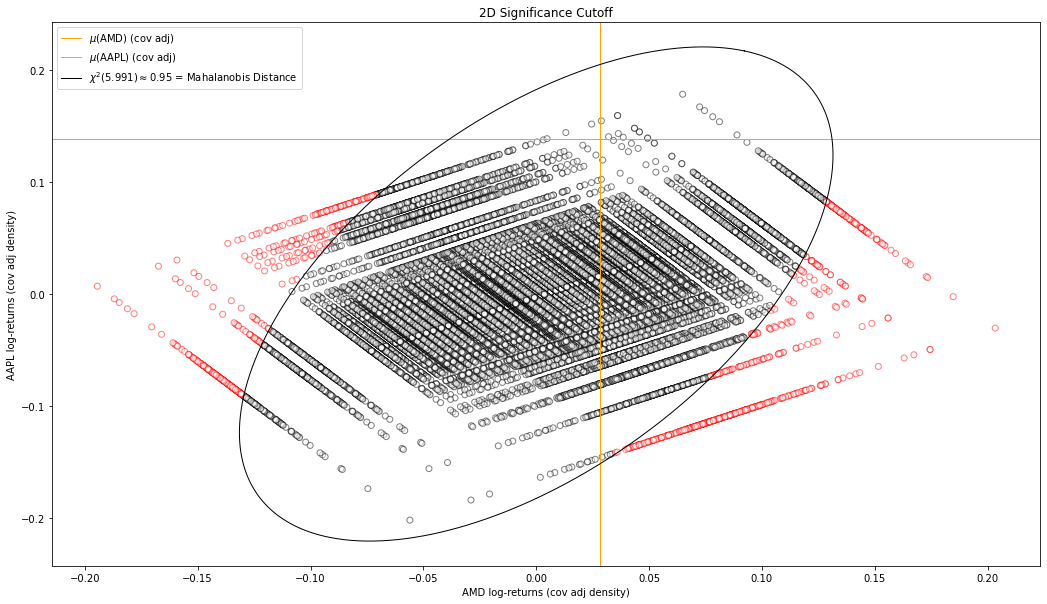

Needed:  5.991464547107979
Given :  3.8220455734328813
The strategies returns are _not_ significant.


In [17]:
'''
As we can see this strategy is signifiant when only run on AMD or only run on AAPL over the same time frame.
Intuition may tell us that if we trade AAPL and AMD with this strategy we would be extreamly signifiant.
Lets test it out.
'''

test3 = SignificanceTester(pd.to_datetime('2020-01-01'))
test3.add_returns('AMD')
test3.add_returns('AAPL')
needed, given = test3.test(np.matrix([[0.10], [0.10]]))

print('Needed: ', needed)
print('Given : ', given)
if given >= needed:
    print('The strategies returns are significant.')
else:
    print('The strategies returns are _not_ significant.')

In [ ]:
'''
Uh oh, what happened? My strategy was working so well on AMD and AAPL! But if I trade them both at the same
time, I'm no different than norma?

Yes. You see, is it no coincidence that your strategy works on AMD and also works on AAPL. They are in the same
sector, and are positivly corrilated. This hypthesis tester takes into account the corrilation between the N assets being
traded and looks at them together along with your strategy.

Hypothesis testing in ND is a powerful tool, if your returns are not signifiante you should go back to the drawing
board. All strategies should be hypothesis tested to make sure that the returns are signifiant to a degree that is
worth trading on.
'''